## Graph data structure
## Copyright: Jagadeesh Vasudevamurthy
## filename:graph.ipynb¶

# All import here

In [1]:
import sys # For getting Python Version
import os
import enum # For enum
from graphviz import Source
import graphviz
import networkx as nx
print("Version of Python I am using is", sys.version)
print("Version of networkx I am using is", nx.__version__)

Version of Python I am using is 3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]
Version of networkx I am using is 2.8.4


# Graph input and output directory setup
# YOU MUST CHANGE 2 lines below

In [2]:
inputFileBase = 'graphdata/'
outputFileBase = 'dot/'

In [3]:
def read_dot_file(f:'string')->'dot_graph':
    filename = outputFileBase + f + ".dot"
    print(filename)
    with open(filename) as f1:
        dot_graph = f1.read()
    print(dot_graph)
    return(dot_graph)

# YOU WRITE CODE HERE

# Write Graph as a dot file

In [4]:
############################################################
# GraphDot.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2020
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType


class GraphDot:
    def __init__(self, g, f):
        self._g = g  # Handle to graph
        self._f = f  # File where you write graph in dot format
        self._of = open(self._f, "w")
        self._write_dot()
        self._of.close()

    ############################################################
    # Write code: _write_dot
    # Use as many private functions and prvate data you want
    ###########################################################
    def _write_dot(self):
        self._of.write('digraph g {\n')
        is_weighted_variable =  self._g.is_weighted_graph()
        weighted_str = ''
        directed_graph=self._g.is_directed_graph();
        if not directed_graph:
            self._of.write('\tedge [dir=none,color=red]\n')
            node_list = self._g.list_of_nodes()
            prev_Node = set()
            for nodes in node_list:
                fan_out = self._g.fanouts_of_node(nodes)
                for n in fan_out:
                    string_var = n +':' +nodes
                    if string_var not in prev_Node:
                        if is_weighted_variable:
                            weighted_str = f"[label={self._g.get_edge_weight(nodes,n)}]"
                        self._of.write(f"\t\t{nodes}->{n}{weighted_str}\n")
                        weighted_str = ''
                        prev_Node.add(nodes+':'+n)
        else:
            self._of.write('\tedge [color=red]')
            node_list = self._g.list_of_nodes()
            for nodes in node_list:
                fan_out = self._g.fanouts_of_node(nodes)
                for n in fan_out:
                    weighted_str=''
                    if is_weighted_variable:
                        weighted_str = f"[label={self._g.get_edge_weight(nodes,n)}]"
                    self._of.write(f"\t\t{nodes}->{n}{weighted_str}\n")

        self._of.write('}')

# DFS USING TIME STAMP

In [5]:
############################################################
# GraphDfs.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType
#from Graph import *
#from Data import *  ##User UDT

############################################################
# Depth First serach using TimeStamp
###########################################################
class GraphDfsUsingTimeStamp:
    def __init__(
        self,
        g: "graph",
        filename: "string",
        dfs_order: "list of Nodes",
        has_loop: "list of size 1",
        work: "list of size 1",
        dfs_traversal_output_file,
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._f = filename
        self._dfs_order = dfs_order
        self._has_loop = has_loop
        self._has_loop[0] = False
        self._work = work
        self._work[0] = 0
        self._dfs_traversal_output_file = dfs_traversal_output_file

        ##YOU CAN has any number of private varibles and funcions
        self._counter = 0
        self._a = {}  ## parallel dictionary. Key is node. Value is Timestamp
        self._set_of_unvisited_nodes = (
            set()
        )  # {} is both for set and dictionary. So you have to explicity say set
        self._dfs()
        self._write_dot()

    ##########################################################
    # Write dot file of DFS traversal
    ##########################################################
    def _write_dot(self):
        print("WRITE CODE AND REMOVE THIS LINE")
        

   
    ##########################################################
    # TIME: THETA(V + E)
    # SPACE: O(Largest path) = O(V)
    ##########################################################
    def _dfs(self):
        print("WRITE CODE AND REMOVE THIS LINE")


## NOTHING CAN BE CHANGED BELOW

# Graph Data

In [6]:
###########################################################
# Data.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################


class Data:
    def __init__(self, n: "string"):
        self._name = n  ### _name is used as key for this object
        self.age = 100  ## To show you can have anything,

    def __hash__(self):
        t = hash(self._name)
        return t

    def __eq__(self, other: "Node") -> "bool":
        if not isinstance(other, type(self)):
            assert False
        return self._name == other._name

    def __str__(self):
        return self._name

    def get_key(self) -> "string":
        return self._name


## Graph Types

In [7]:
class GraphType(enum.Enum): 
    NONE = 0
    UNDIRECTED = 1
    DIRECTED = 2
    WEIGHTED_UNDIRECTED = 3
    WEIGHTED_DIRECTED  = 4

## Graph class

In [8]:
############################################################
# Graph.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 20203
###########################################################

############################################################
# NOTHING CAN BE CHANGED IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
'''
import networkx as nx  ##network nx graph
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Data import *  ##User UDT
from GraphBuilder import *
from GraphDot import *
from GraphShow import *
from GraphDfs import *
'''

class Graph:
    ##GRAPH DATA STRUCTURE
    def __init__(self):
        self._g = None  # networkx graph

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def is_directed_graph(self) -> "bool":
        if self._g.is_directed():
            return True
        return False

    def is_undirected_graph(self) -> "bool":
        return not (self._g.is_directed_graph())

    def is_weighted_graph(self) -> "bool":
        return nx.is_weighted(self._g)

    def get_graph_type(self) -> "GraphType":
        weighted = self.is_weighted_graph()
        if self.is_directed_graph():
            if weighted:
                return GraphType.WEIGHTED_DIRECTED
            else:
                return GraphType.DIRECTED
        if weighted:
            return GraphType.WEIGHTED_UNDIRECTED
        return GraphType.UNDIRECTED

    def get_graph_type_as_string(self) -> "string":
        t = self.get_graph_type()
        if t == GraphType.UNDIRECTED:
            return "UNDIRECTED GRAPH"
        if t == GraphType.DIRECTED:
            return "DIRECTED GRAPH"
        if t == GraphType.WEIGHTED_UNDIRECTED:
            return "WEIGHTED_UNDIRECTED GRAPH"
        if t == GraphType.WEIGHTED_DIRECTED:
            return "WEIGHTED_DIRECTED GRAPH"
        return "NONE"

    def get_node_name(self, n: "node") -> "string":
        return str(n)

    def get_edge_weight(self, f: "node1", t: "node2") -> "weight":
        w = 0
        if self.is_weighted_graph():
            w = self._g.edges[f, t]["weight"]
        return w

    def get_numV(self) -> "int":
        l = self._g.number_of_nodes()
        return l

    def get_numE(self) -> "int":
        l = self._g.number_of_edges()
        return l

    def fanouts_of_node(self, n: "node") -> "list of nodes":
        if self.is_directed_graph():
            a = list(self._g.successors(n))
        else:
            a = self._g.adj[n]
        return a

    def fanins_of_node(self, n: "node") -> "list of nodes":
        assert self.is_directed_graph()
        a = list(self._g.predecessors(n))
        return a

    def num_fanout(self, n: "node") -> "int":
        a = self.fanouts_of_node(n)
        s = len(a)
        return s

    def num_fanin(self, n: "node") -> "int":
        a = self.fanins_of_node(n)
        s = len(a)
        return s

    def list_of_nodes(self) -> "list of nodes":
        l = list(self._g.nodes())
        return l

    def dump(self, name):
        print("------------", name, "------------ ")
        s = self.get_graph_type_as_string()
        print(s)
        print("Num Vertices =", self.get_numV())
        print("Num Edges    =", self.get_numE())
        nodes = self.list_of_nodes()
        for n in nodes:
            print(n, "Fanouts: ", end="")
            fanouts_of_n = self.fanouts_of_node(n)
            f = len(fanouts_of_n)
            if f == 0:
                print("NONE")
            else:
                j = 0
                for nf in fanouts_of_n:
                    if j < f - 1:
                        print(nf, ",", sep="", end="")
                    else:
                        print(nf)
                    j = j + 1
            if self.is_directed_graph():
                print(n, "Fanins: ", end="")
                fanins_of_n = self.fanins_of_node(n)
                f = len(fanins_of_n)
                if f == 0:
                    print("NONE")
                else:
                    j = 0
                    for nf in fanins_of_n:
                        if j < f - 1:
                            print(nf, ",", sep="", end="")
                        else:
                            print(nf)
                        j = j + 1

    ##########################################################
    # Nothing can be changed
    # TIME: THETA(V + E)
    # SPACE: THETA(V)
    ##########################################################
    def assert_dfs_passed(self, has_loop: "bool", dfs_order: "list of nodes"):
        t = self.get_graph_type()
        if (t == GraphType.UNDIRECTED) or (t == GraphType.WEIGHTED_UNDIRECTED):
            return
        if has_loop == False:
            set_of_visited_nodes = set()
            for n in dfs_order:
                ## Go on fanins of node
                fanins_of_n = self.fanins_of_node(n)
                for nf in fanins_of_n:
                    must_be_there = nf in set_of_visited_nodes  # find in THETA(1)
                    assert must_be_there
                set_of_visited_nodes.add(n)  # add in THETA(1)
            # All nodes must be visited
            assert len(set_of_visited_nodes) == self.get_numV()
            print("DFS ASSERT PASSED")

    ############################################################
    # All Private routines. YOU SHOULD NOT CALL THESE ROUTINES
    ###########################################################

    ############################################################
    ## All the routines written by students
    ##########################################################
    def build_graph(self, f: "file name", d: "bool"):
        b = GraphBuilder(self, f, d)  # d True means directed. False means undirected

    def write_dot(self, f):
        b = GraphDot(self, f)

    def show_dot_file(self, filename: "string"):
        with open(filename) as f:
            dot_graph = f.read()
        return dot_graph

    def dfs_using_time_stamp(
        self,
        gname: "string",
        dfs_order: "list of nodes",
        has_loop: "List of size 1 Boolean",
        work: "list of size 1",
        dfs_dot_output_file: "Traversal file name",
    ):

        b = GraphDfsUsingTimeStamp(
            self, gname, dfs_order, has_loop, work, dfs_dot_output_file
        )


## Graph Builder class

In [9]:
############################################################
# GraphBuilder.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType


class GraphBuilder:
    def __init__(self,g:'graph', f: "string", d: "bool"):
        self._g = g ; #graph object
        self._f = f  # File from which you are building graph
        self._directed = d  # true means directed graph
        self._g._g = self._build_graph()

    ############################################################
    # Write code: build_graph
    # Use as many private functions and prvate data you want
    ###########################################################
    def _build_graph(self) -> "graph":
        notReadline = 0
        readline = 0
        if self._directed:
            g = nx.DiGraph()
        else:
            g = nx.Graph()
        with open(self._f, "r") as file:
            data = file.readlines()
            for aline in data:
                token = aline.split()
                size = len(token)
                if (size < 2) or (size > 3):
                    notReadline = notReadline + 1
                    print("NOT READ LINE", aline)
                    continue
                readline = readline + 1
                if size == 3:
                    #  weighted graph
                    #   Hard to debug
                    #   g.add_edge('A', 'B', weight=3)
                    g.add_edge(token[0], token[1], weight=token[2])
                else:
                    g.add_edge(token[0], token[1])
        return g


# DFS TESTER

In [10]:
############################################################
# GraphDfsTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
'''
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Graph import *
from Data import *  ##User UDT
from GraphGlobal import *
'''

class GraphDfsTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        # self._test_one()
        self._test()

    def _test1(self, gname: "graphname", directed: "bool", expected_has_loop: "Bool"):
        full_name = inputFileBase + gname + ".txt"

        print("Building graph", full_name)
        g = Graph()
        g.build_graph(full_name,directed)
        if self._show:
            g.dump(full_name)

        dot_output_file = outputFileBase + gname + ".dot"
        g.write_dot(dot_output_file)

        dfs_order = []  # Caller will Fill. List of Nodes
        has_loop = [False]  # List of size 1
        work = [0]  # List of size 1
        dfs_dot_output_file = outputFileBase + gname + "dfs.dot"
        g.dfs_using_time_stamp(gname, dfs_order, has_loop, work, dfs_dot_output_file)

        print("DFS traversal is in")
        print(dfs_dot_output_file)

        print("DFS ORDER: ", end=" ")
        for node in dfs_order:
            p1 = g.get_node_name(node)
            print(p1, end=" ")
        print()

        if has_loop[0]:
            print("LOOP")
        else:
            print("NOLOOP")
        print("Work Done", work[0])
        assert has_loop[0] == expected_has_loop
        g.assert_dfs_passed(has_loop[0],dfs_order)

    def _test_one(self):
        g = [
            ["1", GraphType.UNDIRECTED, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])

    def _test(self):
        g = [
            ["u1", False, False],
            ["1", False, False],
            ["udf1", True, True],
            ["2", True, False],
            ["3", True, True],
            ["cat", True, False],
            ["7", True, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])


# Graph Representation Tester

In [11]:
############################################################
# GraphRepresentationTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType
#from Graph import *


class GraphRepresentationTest:
    def __init__(self):
        self._test()

    def _u1(self):
        name = "13"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, False)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 7
        assert g.get_numE() == 12

    def _uw1(self):
        name = "14"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, False)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 10

    def _d1(self):
        name = "15"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 6

    def _dw1(self):
        name = "16"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 5
        assert g.get_numE() == 6

    def _DAG(self):
        name = "cat"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 7
        
    def _loop(self):
        name = "loopparallel"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        #assert g.get_numV() == 6
        #assert g.get_numE() == 7

    def _test(self):
        self._u1()
        self._uw1()
        self._d1()
        self._dw1()
        self._DAG()
        self._loop()


# Graph tester

In [12]:
############################################################
# GraphTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
'''
import sys  # For getting Python Version
import enum
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Graph import *
from GraphRepresentationTest import *
from GraphDfsTest import *
'''

class GraphTest:
    def __init__(self):
        pass

    def RepresentationTest(self):
        t = GraphRepresentationTest()

    def DFS(self):
        t = GraphDfsTest()


# Main

In [13]:
############################################################
# main 
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print(sys.version)
    t = GraphTest()
    a = [1, 0]
    if a[0]:
        t.RepresentationTest()
        print("test_graph_representation Passed")
    if a[1]:
        t.DFS()
        print("DFS Passed")

# call Main

In [14]:
############################################################
# start up
###########################################################
if (__name__  == '__main__'):
      main()

3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]
------------ 13 ------------ 
UNDIRECTED GRAPH
Num Vertices = 7
Num Edges    = 12
1 Fanouts: 2,3,4
2 Fanouts: 1,5,4
3 Fanouts: 1,6,4
4 Fanouts: 1,2,3,5,7,6
5 Fanouts: 2,4,7
6 Fanouts: 3,7,4
7 Fanouts: 4,5,6
dot/13.dot
digraph g {
	edge [dir=none,color=red]
		1->2
		1->3
		1->4
		2->5
		2->4
		3->6
		3->4
		4->5
		4->7
		4->6
		5->7
		6->7
}
------------ 14 ------------ 
WEIGHTED_UNDIRECTED GRAPH
Num Vertices = 6
Num Edges    = 10
1 Fanouts: 2,3,4
2 Fanouts: 1,3,5
3 Fanouts: 1,2,4,5,6
4 Fanouts: 1,3,6
5 Fanouts: 2,3,6
6 Fanouts: 3,4,5
dot/14.dot
digraph g {
	edge [dir=none,color=red]
		1->2[label=6.2]
		1->3[label=1.2]
		1->4[label=5]
		2->3[label=5.2]
		2->5[label=3.2]
		3->4[label=5]
		3->5[label=4]
		3->6[label=4]
		4->6[label=2]
		5->6[label=6]
}
------------ 15 ------------ 
DIRECTED GRAPH
Num Vertices = 6
Num Edges    = 6
A Fanouts: B
A Fanins: NONE
B Fanouts: C
B Fanins: A,D
E Fanouts: F,D
E Fanins: C
F Fanouts: NONE
F Fanins: 

# Graph representations

dot/13.dot
digraph g {
	edge [dir=none,color=red]
		1->2
		1->3
		1->4
		2->5
		2->4
		3->6
		3->4
		4->5
		4->7
		4->6
		5->7
		6->7
}


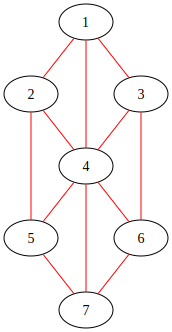

In [15]:
Source(read_dot_file("13"))

dot/14.dot
digraph g {
	edge [dir=none,color=red]
		1->2[label=6.2]
		1->3[label=1.2]
		1->4[label=5]
		2->3[label=5.2]
		2->5[label=3.2]
		3->4[label=5]
		3->5[label=4]
		3->6[label=4]
		4->6[label=2]
		5->6[label=6]
}


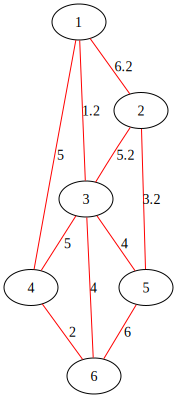

In [16]:
Source(read_dot_file("14"))

dot/15.dot
digraph g {
	edge [color=red]		A->B
		B->C
		E->F
		E->D
		D->B
		C->E
}


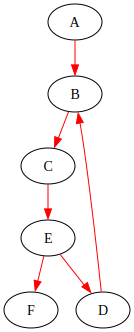

In [17]:
Source(read_dot_file("15"))

dot/16.dot
digraph g {
	edge [color=red]		A->C[label=12.8]
		A->D[label=60]
		C->B[label=20]
		C->D[label=32.9]
		B->A[label=10]
		E->A[label=7]
}


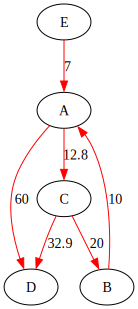

In [18]:
Source(read_dot_file("16"))

dot/cat.dot
digraph g {
	edge [color=red]		Bar->Bat
		Cab->Car
		Cab->Cat
		Car->Bar
		Mat->Bat
		Cat->Mat
		Cat->Bat
}


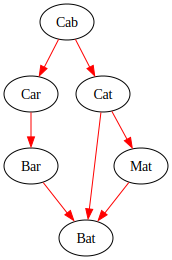

In [19]:
Source(read_dot_file("cat"))

dot/loopparallel.dot
digraph g {
	edge [color=red]		s->0[label=2]
		0->1[label=5]
		1->1[label=3]
		1->t[label=3]
}


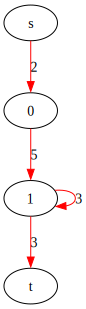

In [20]:
Source(read_dot_file("loopparallel"))

# DFS TRAVERSAL

In [21]:
Source(read_dot_file("u1dfs"))

dot/u1dfs.dot


FileNotFoundError: [Errno 2] No such file or directory: 'dot/u1dfs.dot'

In [ ]:
Source(read_dot_file("1dfs"))

In [ ]:
Source(read_dot_file("udf1dfs"))

In [ ]:
Source(read_dot_file("2dfs"))

In [ ]:
Source(read_dot_file("3dfs"))

In [ ]:
Source(read_dot_file("catdfs"))

In [ ]:
Source(read_dot_file("7dfs"))